# Полиномиальная регрессия через scikit-learn

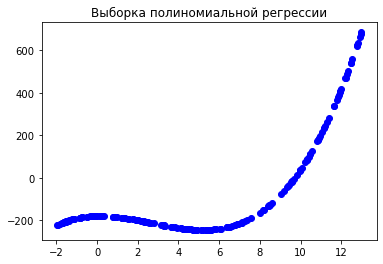

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from time import time

# Градиентный спуск с РЕГУЛЯРИЗАЦИЕЙ

TOTAL = 200

X = 15 * np.random.rand(TOTAL, 1) - 2
Y = 2 * X - 8 * (X)**2 + (X)**3 + 10 + np.random.normal(0, TOTAL)

# X = np.msort(X)
# Y = np.msort(Y)

plt.title('Выборка полиномиальной регрессии')
plt.plot(X, Y, 'bo')
plt.show()

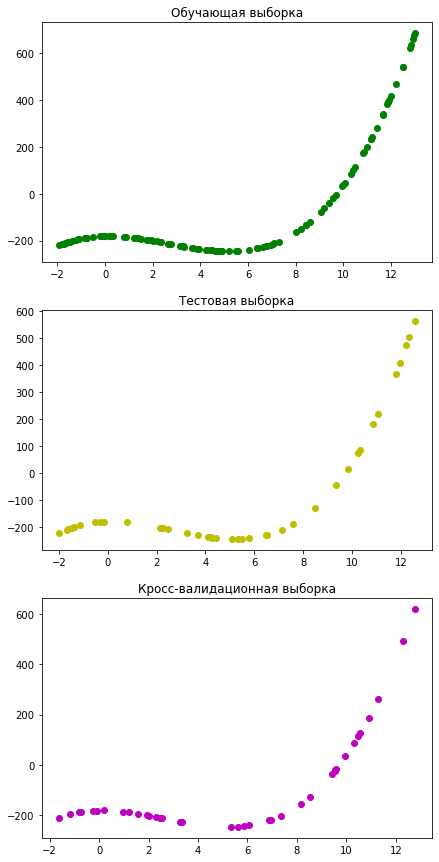

In [2]:
X_train, X_interval, Y_train, Y_interval = train_test_split(X, Y, test_size=0.4)
X_test, X_val, Y_test, Y_val = train_test_split(X_interval, Y_interval, test_size=0.5)

# X_train, X_val, X_test = np.msort(X_train), np.msort(X_val), np.msort(X_test)
# Y_train, Y_val, Y_test = np.msort(Y_train), np.msort(Y_val), np.msort(Y_test)

# Настройка размеров подложки
plt.figure(figsize=(7, 15))

# Вывод графиков
plt.subplot(3, 1, 1)
plt.title('Обучающая выборка')
plt.plot(X_train, Y_train, 'go')

plt.subplot(3, 1, 2)
plt.title('Тестовая выборка')
plt.plot(X_test, Y_test, 'yo')

plt.subplot(3, 1, 3)
plt.title('Кросс-валидационная выборка')
plt.plot(X_val, Y_val, 'mo')

plt.show()

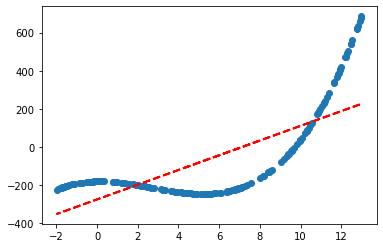

linear_regression in 0.115525 seconds


In [3]:
def linear_regression(x, y):
    lin_reg = LinearRegression()

    lin_reg.fit(x, y)

    plt.scatter(x, y)
    plt.plot(x, lin_reg.predict(x), 'r--', linewidth=2.0)
    plt.show()

time_start = time()
linear_regression(X, Y)
print("linear_regression in %f seconds" % (time() - time_start))

### Разумеется, для определения такой модели линейная регресиия вообще никуда не годится

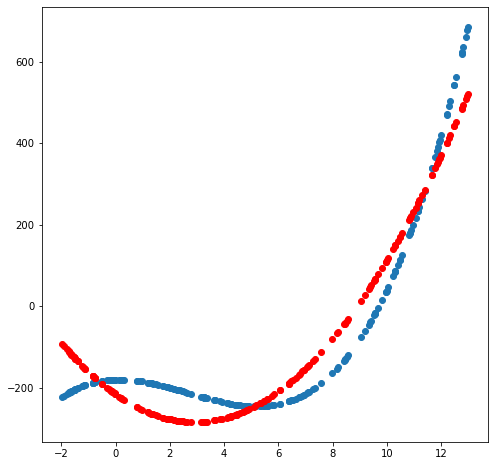

sk_polynomial_regression in 0.137018 seconds


In [4]:
# Возьмем степень = 2, для cглаживания
def sk_polynomial_2(x, y):   
    poly_reg = PolynomialFeatures(degree=2)
    X_poly = poly_reg.fit_transform(x)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y)
    
    model = pol_reg.predict(X_poly)
    
    plt.figure(figsize=(8, 8))
    plt.scatter(x, y)
    plt.plot(X, model, 'ro')
    plt.show()

time_start = time()
sk_polynomial_2(X, Y)
print("sk_polynomial_regression in %f seconds" % (time() - time_start))

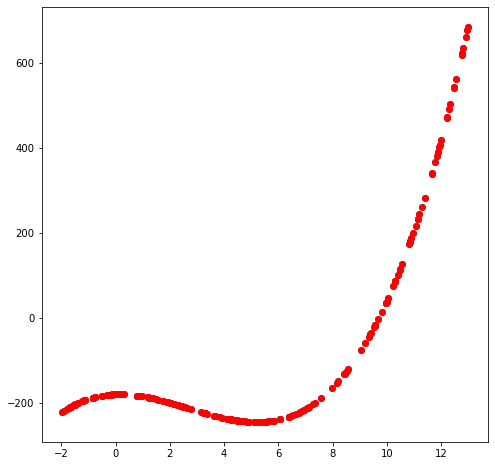

sk_polynomial_regression in 0.134020 seconds


In [5]:
# Возьмем степень = 3, для точности описания модели
def sk_polynomial_3(x, y):   
    poly_reg = PolynomialFeatures(degree=3)
    X_poly = poly_reg.fit_transform(x)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y)
    
    model = pol_reg.predict(X_poly)
    
    plt.figure(figsize=(8, 8))
    plt.scatter(x, y)
    plt.plot(X, model, 'ro')
    plt.show()

time_start = time()
sk_polynomial_3(X, Y)
print("sk_polynomial_regression in %f seconds" % (time() - time_start))

### Больше степень делать делать не стоит, дабы избежать переобучения

#### Попробуем сделать тоже самое, но уже используя данные на разбитые выборки

In [6]:
def sk_cross_val(x, y):  # Отсюда строить график J(l) валидационной выборки
    for i in range(5): 
        poly_reg = PolynomialFeatures(degree=i+1)

        X_train_poly = poly_reg.fit_transform(X_train)

        pol_reg = LinearRegression()
        pol_reg.fit(X_train_poly, Y_train)

        y_train_predict = pol_reg.predict(X_train_poly)

        y_val_predict = pol_reg.predict(poly_reg.fit_transform(X_val))
        
        # evaluating the model on validation dataset
        rmse_val = np.sqrt(mean_squared_error(Y_val, y_val_predict))
        r2_val = r2_score(Y_val, y_val_predict)
        
        print("The model performance for the val set: degree=" + str(i+1))
        print("RMSE of val set is {}".format(rmse_val))
        print("R2 score of val set is {}".format(r2_val))
        print("-------------------------------------------\n")
        
time_start = time()
sk_cross_val(X, Y)
print("sk_cross_val in %f seconds" % (time() - time_start))

The model performance for the val set: degree=1
RMSE of val set is 144.1764673190776
R2 score of val set is 0.469298807559303
-------------------------------------------

The model performance for the val set: degree=2
RMSE of val set is 66.68848515410434
R2 score of val set is 0.8864563089009874
-------------------------------------------

The model performance for the val set: degree=3
RMSE of val set is 6.050053388380548e-13
R2 score of val set is 1.0
-------------------------------------------

The model performance for the val set: degree=4
RMSE of val set is 6.307970947066368e-12
R2 score of val set is 1.0
-------------------------------------------

The model performance for the val set: degree=5
RMSE of val set is 2.0970576040555557e-11
R2 score of val set is 1.0
-------------------------------------------

sk_cross_val in 0.017960 seconds


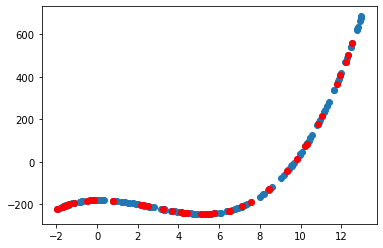

sk_polynomial_regression in 0.093451 seconds


In [7]:
def sk_polynomial(x, y):
    poly_reg = PolynomialFeatures(degree=5)
    
    X_train_poly = poly_reg.fit_transform(X_train)

    pol_reg = LinearRegression()
    pol_reg.fit(X_train_poly, Y_train)

    y_train_predict = pol_reg.predict(X_train_poly)

    y_test_predict = pol_reg.predict(poly_reg.fit_transform(X_test))
    
    plt.scatter(x, y)
    plt.plot(X_test, y_test_predict, 'ro', linewidth=2.0)
    plt.show()

time_start = time()
sk_polynomial(X, Y)
print("sk_polynomial_regression in %f seconds" % (time() - time_start))